In [17]:
from datetime import date, timedelta, datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import functions as f

In [18]:
def plot_top_5_cryptos_from_data(data, tokens):
    """
    data: список датафреймов, полученных из parse_token_data
    tokens: словарь вида {'bitcoin': 'BTC', ...}
    """

    latest_caps = []
    
    for token_name, df in zip(tokens.values(), data):
        if 'market_cap' not in df.columns:
            continue  # пропускаем, если нет данных по капитализации
        last_row = df.dropna(subset=['market_cap']).iloc[-1]
        market_cap = last_row['market_cap']
        latest_caps.append((token_name, market_cap))

    # Сортируем по капитализации и берём топ-5
    top5 = sorted(latest_caps, key=lambda x: x[1], reverse=True)[:5]
    
    labels = [item[0] for item in top5]
    values = [item[1] for item in top5]

    plt.figure(figsize=(7, 7))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Top-5 Kryptowährungen nach Marktkapitalisierung (aktuell)')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


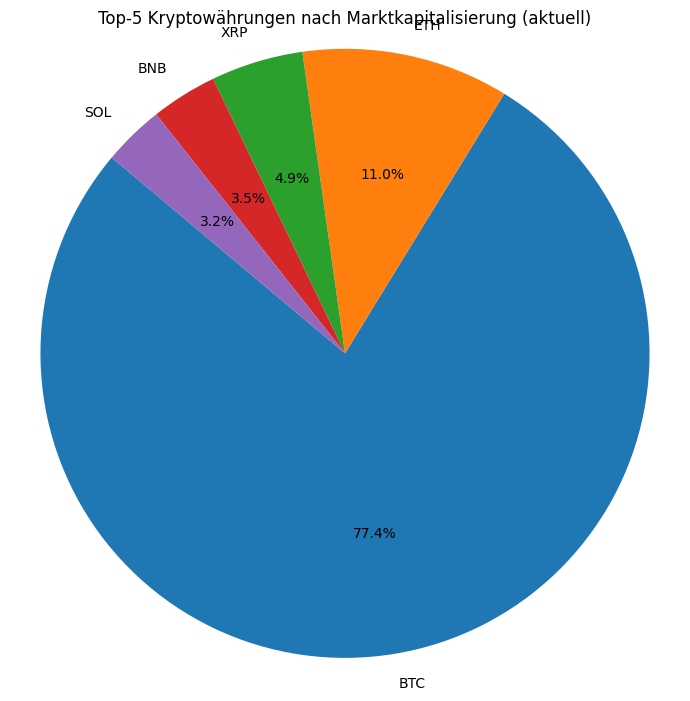

In [19]:
tokens = {'bitcoin': 'BTC', 'ethereum': 'ETH', 'ripple': 'XRP', 'binancecoin': 'BNB', 'solana': 'SOL',
          'dogecoin': 'DOGE', 'cardano': 'ADA', 'tron': 'TRX', 'chainlink': 'LINK', 'avalanche-2': 'AVAX'}

data = [f.parse_token_data(token, 365) for token in tokens.keys()]
plot_top_5_cryptos_from_data(data, tokens)
